# Laboratorio 3 - Parte 2

### Arboles de decisión y Random Forest

### 2018-II

#### Profesor: Julián D. Arias Londoño
#### julian.ariasl@udea.edu.co


## Guía del laboratorio

En esta archivo va a encontrar tanto celdas de código cómo celdas de texto con las instrucciones para desarrollar el laboratorio.

Lea atentamente las instrucciones entregadas en las celdas de texto correspondientes y proceda con la solución de las preguntas planteadas.

Nota: no olvide ir ejecutando las celdas de código de arriba hacia abajo para que no tenga errores de importación de librerías o por falta de definición de variables.

In [173]:
#Tomado de https://github.com/rramosp/mooc-grader
from Autentication import *#python 3
import inspect, urllib
html, auth_code, userinfo = google_authenticate(PORT_NUMBER=8080)
html

Haga click en el siguiente enlace para autenticarse con su cuenta de correo institucional
https://accounts.google.com/o/oauth2/auth?client_id=893762525034-g9d91ddls9e19a1q77c7hsq2rhgqo9h7.apps.googleusercontent.com&redirect_uri=http%3A%2F%2Flocalhost%3A8080&scope=profile+email&access_type=offline&response_type=code
waiting for authentication ...
code=4/XQC8oDpKhi5vgOUswk2mkrVSstUg-tTc95AK3RgM2-tC-OFJzYvEqAwls_uomWCOxVSyN9YuZfL8eR6J2pszDcE&scope=https://www.googleapis.com/auth/userinfo.profile+https://www.googleapis.com/auth/userinfo.email
No authentication


#### Primer integrante: John Alexander Galeano Ospina
#### Segundo integrante: Sidney Paola Aguirre Castro

In [14]:
%matplotlib inline
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from scipy import stats
from __future__ import division

#Algunas advertencias que queremos evitar
import warnings
warnings.filterwarnings("always")

## Ejercicio 1

A continuación se leen los datos de un problema de clasificación. El problema corresponde a la clasifiación de dígitos escritos a mano, el cual fue abordado en el laboratorio anterior. Usaremos únicamente 4 de las 10 clases disponibles. Los datos fueron preprocesados para reducir el número de características. La técnica usada será analizada más adelante en el curso.

In [15]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
digits = load_digits(n_class=4)

#--------- preprocesamiento--------------------
pca = PCA(0.99, whiten=True)
data = pca.fit_transform(digits.data)

#---------- Datos a usar ----------------------
X = data
Y = digits.target
    

En la siguiente celda se define una simulación para entrenar y validar un modelo usando los datos previamente cargados. Complete el código para usar como modelo de predicción un arbol de decisión. Debe consultar todo lo relacionado con la creación, entrenamiento y uso en predicción de este modelo usando la librería scikit-learn. Consultar aquí: http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

<b>Note</b> que existe una clase para modelos de clasificación y otra para modelos de regresión:
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

In [17]:
from __future__ import division
import numpy as np
from numpy import random
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import KFold
from sklearn import tree
from sklearn.metrics import confusion_matrix
#from classification_metrics import *
from sklearn.tree import DecisionTreeClassifier
import time
import math


#Validamos el modelo
Folds = 4
random.seed(19680801)
EficienciaTrain = np.zeros(Folds)
EficienciaVal = np.zeros(Folds)
skf = StratifiedKFold(n_splits=Folds)
j = 0
for train, test in skf.split(X, Y):
    Xtrain = X[train,:]
    Ytrain = Y[train]
    Xtest = X[test,:]
    Ytest = Y[test]
    
    #Normalizamos los datos
    """"media = np.mean(Xtrain)
    desvia = np.std(Xtrain)
    Xtrain = sc.stats.stats.zscore(Xtrain)
    Xtest = (Xtest - np.matlib.repmat(media, Xtest.shape[0], 1))/np.matlib.repmat(desvia, Xtest.shape[0], 1)"""
    
    prof = 10
    model = DecisionTreeClassifier(max_depth=prof)
    model.fit(Xtrain,Ytrain)
     
    
    #Validación
    Ytrain_pred = model.predict(Xtrain) #Use el modelo previamente entrenado para hacer predicciones con las mismas muestras de entrenamiento
    Yest = model.predict(Xtest) #Use el modelo previamente entrenado para hacer predicciones con las muestras de test
    
    #Evaluamos las predicciones del modelo con los datos de test
    EficienciaTrain[j] = np.mean(Ytrain_pred.ravel() == Ytrain.ravel())
    EficienciaVal[j] = np.mean(Yest.ravel() == Ytest.ravel())
    j += 1
        
print('Eficiencia durante el entrenamiento = ' + str(np.mean(EficienciaTrain)) + '+-' + str(np.std(EficienciaTrain)))
print('Eficiencia durante la validación = ' + str(np.mean(EficienciaVal)) + '+-' + str(np.std(EficienciaVal)))


Eficiencia durante el entrenamiento = 1.0+-0.0
Eficiencia durante la validación = 0.9041819614588368+-0.03325916115155368


Responda:

1.1 ¿Cuáles criterios para detener el crecimiento del árbol o de los nodos están disponibles en la librería?:
R: con el argumento max_depth se controla el crecimiento del árbol, si no se especifica, entonces el arbol se expande hasta que las hojas sean puras, ó hasta que contengan menos muestras que las requeridas para dividir un nodo con min_samples_split.

1.2. ¿Cuáles son los parámetros asociados con los criterios enumerados en el punto anterior?
R: max_depth y min_samples_split.


## Ejercicio 2

Una vez completado el código realice los experimentos necesarios para llenar la siguiente tabla:

In [8]:
import pandas as pd
import qgrid
randn = np.random.randn
df_types = pd.DataFrame({
    'Maxima profundidad' : pd.Series([5,10,20,30,50])})
df_types["Eficiencia en validacion"] = ""
df_types["Intervalo de confianza"] = ""
df_types.set_index(['Maxima profundidad'], inplace=True)
#df_types.sort_index(inplace=True)
qgrid_widget = qgrid.show_grid(df_types, show_toolbar=False)
qgrid_widget

ModuleNotFoundError: No module named 'qgrid'

Ejecute la siguiente instrucción para dejar guardados en el notebook los resultados de las pruebas.

In [113]:
qgrid_widget.get_changed_df()

,Eficiencia en validacion,Intervalo de confianza
Maxima profundidad,,
5,0.9112,0.0446
10,0.9014,0.0324
20,0.9014,0.0324
30,0.9014,0.0324
50,0.9014,0.0324


Responda: 
    
2.1 ¿Tiene algún efecto la normalización o estándarización de las variables en el desempeño del modelo de árboles de decisión? Explique su respuesta.

R: Tiene un efecto sobre el desempeño del modelo, pero es mínimo, por lo tanto no es requerido normalizar los datos.
Por ejemplo, con una profundidad de 10 en el árbol de decisión, la eficiencia obtenida es de 0.9041, y con los datos normalizados, según la tabla obtenida es de 0.9014. 

## Ejercicio 3

En la siguiente celda se define una simulación para entrenar y validar un modelo usando los datos previamente cargados. Complete el código para usar como modelo de predicción un Random Forest. Debe consultar todo lo relacionado con la creación, entrenamiento y uso en predicción de este modelo usando la librería scikit-learn. Consultar aquí: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html 

<b>Note</b> que al igual que en el caso anterior, existe una clase para modelos de clasificación y otra para modelos de regresión: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [18]:
from sklearn.ensemble import RandomForestClassifier

#Validamos el modelo
Folds = 4
random.seed(19680801)
EficienciaTrain = np.zeros(Folds)
EficienciaVal = np.zeros(Folds)
skf = StratifiedKFold(n_splits=Folds)
j = 0

tiempos = []

for train, test in skf.split(X, Y):
    Xtrain = X[train,:]
    Ytrain = Y[train]
    Xtest = X[test,:]
    Ytest = Y[test]
    
    #Normalizamos los datos
    media = np.mean(Xtrain)
    desvia = np.std(Xtrain)
    Xtrain = sc.stats.stats.zscore(Xtrain)
    Xtest = (Xtest - np.matlib.repmat(media, Xtest.shape[0], 1))/np.matlib.repmat(desvia, Xtest.shape[0], 1)
    
    #Haga el llamado a la función para crear y entrenar el modelo usando los datos de entrenamiento
    arboles = 5
    var = 20
    model = RandomForestClassifier(n_estimators=arboles, max_features=var)
    model.fit(Xtrain,Ytrain)
    #cvar = model.n_features_ #numero de variables del modelo
    
        
    #Validación
    Ytrain_pred = model.predict(Xtrain) #Use el modelo previamente entrenado para hacer predicciones con las mismas muestras de entrenamiento
    Yest = model.predict(Xtest) #Use el modelo previamente entrenado para hacer predicciones con las muestras de test
    
    #Evaluamos las predicciones del modelo con los datos de test
    EficienciaTrain[j] = np.mean(Ytrain_pred.ravel() == Ytrain.ravel())
    EficienciaVal[j] = np.mean(Yest.ravel() == Ytest.ravel())
    j += 1
    
    
print('Eficiencia durante el entrenamiento = ' + str(np.mean(EficienciaTrain)) + '+-' + str(np.std(EficienciaTrain)))
print('Eficiencia durante la validación = ' + str(np.mean(EficienciaVal)) + '+-' + str(np.std(EficienciaVal)))


Eficiencia durante el entrenamiento = 0.9976860250624457+-0.0007984236624606809
Eficiencia durante la validación = 0.9362140803004042+-0.027417037303269644


Una vez completado el código realice los experimentos necesarios para llenar la siguiente tabla:

In [48]:
import pandas as pd
import qgrid
randn = np.random.randn
df_types = pd.DataFrame({
    'Numero de arboles' : pd.Series([5,5,5,5,5,5,10,10,10,10,10,10,20,20,20,20,20,20,50,50,50,50,50,50,100,100,100,100,100,100]), 'Variables analizadas por nodo' : pd.Series([5,10,15,20,25,30,5,10,15,20,25,30,5,10,15,20,25,30,5,10,15,20,25,30,5,10,15,20,25,30])})
df_types["Eficiencia en validacion"] = ""
df_types["Intervalo de confianza"] = ""
df_types.set_index(['Numero de arboles','Variables analizadas por nodo'], inplace=True)
#df_types.sort_index(inplace=True)
df_types["Eficiencia en validacion"][0]=0.8778
df_types["Intervalo de confianza"][0] = 0.0143
qgrid_widget = qgrid.show_grid(df_types, show_toolbar=False)
qgrid_widget

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

Ejecute la siguiente instrucción para dejar guardados en el notebook los resultados de las pruebas.

In [101]:
qgrid_widget.get_changed_df()

Eficiencia en validacion  \
Numero de arboles Variables analizadas por nodo                            
5                 5                                               0.8778   
                  10                                              0.9249   
                  15                                              0.9375   
                  20                                              0.9362   
                  25                                              0.9027   
                  30                                              0.9237   
10                5                                               0.9153   
                  10                                              0.9265   
                  15                                              0.9236   
                  20                                              0.9250   
                  25                                              0.9223   
                  30                                              0.9223   
20                5                                               0.9458   
                  10                                              0.9348   
                  15                                              0.9388   
                  20                                              0.9333   
                  25                                              0.9264   
                  30                                              0.9306   
50                5                                               0.9555   
                  10                                              0.9527   
                  15                                              0.9472   
                  20                                              0.9347   
                  25                                              0.9375   
                  30                                              0.9250   
100               5                                               0.9694   
                  10                                              0.9583   
                  15                                              0.9416   
                  20                                              0.9347   
                  25                                              0.9347   
                  30                                              0.9292   

                                                Intervalo de confianza  
Numero de arboles Variables analizadas por nodo                         
5                 5                                             0.0143  
                  10                                            0.0364  
                  15                                            0.0154  
                  20                                            0.0274  
                  25                                            0.0278  
                  30                                            0.0327  
10                5                                             0.0336  
                  10                                            0.0242  
                  15                                            0.0345  
                  20                                            0.0250  
                  25                                            0.0268  
                  30                                            0.0304  
20                5                                             0.0152  
                  10                                            0.0248  
                  15                                            0.0229  
                  20                                            0.0244  
                  25                                            0.0252  
                  30                                            0.0278  
50                5                                             0.0207  
                  10                                            0.0239  
         

Responda:
    
3.1 Realice una prueba adicional empleando el total de variables para la selección del mejor umbral en cada nodo ¿De acuerdo con los resultados es mejor usar un bagging de árboles o Random Forest? Explique su respuesta.  

R: Con todas las variables, (El modelo tiene 39 características), el resultado obtenido se muestra a continuación:

    Árboles            Eficiencia+-intervalo de Confianza

    5               0.8679209469037824+-0.03494183927878393

    10              0.919491471803523+-0.01928076973100282

    20              0.9527499515900375+-0.023919225780921167

    50              0.9610610320863378+-0.023849163448816137

    100             0.9652287291316153+-0.012808847013543736


Por lo tanto, se puede observar que la eficiencia en la validación, generalmente, es mayor cuando se evalúa con todas las variables del modelo y que el intervalo de confianza no varía mucho, por lo que es mejor utilizar el bagging.

## Ejercicio 4

Utilice el paquete time (instrucción time.clock()) para medir el efecto del número de árboles y de la cantidad de variables a analizar por nodo, en el tiempo que tarda el entrenamiento del modelo Random Forest. Construya una gráfica de tiempo vs número de árboles, dejando constante el número de variables en 20, y una gráfica de tiempo vs número de variables dejando constante el número de árboles en 30.

In [20]:
def train_random_forest(num_tree, max_var):
    #Validamos el modelo
    Folds = 4
    random.seed(19680801)
    EficienciaTrain = np.zeros(Folds)
    EficienciaVal = np.zeros(Folds)
    skf = StratifiedKFold(n_splits=Folds)
    j = 0

    tiempos = []

    for train, test in skf.split(X, Y):
        Xtrain = X[train,:]
        Ytrain = Y[train]
        Xtest = X[test,:]
        Ytest = Y[test]

        #Normalizamos los datos
        media = np.mean(Xtrain)
        desvia = np.std(Xtrain)
        Xtrain = sc.stats.stats.zscore(Xtrain)
        Xtest = (Xtest - np.matlib.repmat(media, Xtest.shape[0], 1))/np.matlib.repmat(desvia, Xtest.shape[0], 1)

        #Haga el llamado a la función para crear y entrenar el modelo usando los datos de entrenamiento
        model = RandomForestClassifier(n_estimators = num_tree, max_features = max_var)
        model.fit(Xtrain,Ytrain)
        #cvar = model.n_features_ #numero de variables del modelo


        #Validación
        Ytrain_pred = model.predict(Xtrain) #Use el modelo previamente entrenado para hacer predicciones con las mismas muestras de entrenamiento
        Yest = model.predict(Xtest) #Use el modelo previamente entrenado para hacer predicciones con las muestras de test

        #Evaluamos las predicciones del modelo con los datos de test
        EficienciaTrain[j] = np.mean(Ytrain_pred.ravel() == Ytrain.ravel())
        EficienciaVal[j] = np.mean(Yest.ravel() == Ytest.ravel())
        j += 1


    print('Eficiencia durante el entrenamiento = ' + str(np.mean(EficienciaTrain)) + '+-' + str(np.std(EficienciaTrain)))
    print('Eficiencia durante la validación = ' + str(np.mean(EficienciaVal)) + '+-' + str(np.std(EficienciaVal)))

Eficiencia durante el entrenamiento = 0.9976860250624457+-0.0007984236624606809
Eficiencia durante la validación = 0.9362140803004042+-0.027417037303269644
Eficiencia durante el entrenamiento = 0.9995387453874539+-0.0007989164241553753
Eficiencia durante la validación = 0.925032275023267+-0.025014339189166224
Eficiencia durante el entrenamiento = 0.9995361781076066+-0.0008033630832879904
Eficiencia durante la validación = 0.9333274113200392+-0.02439902945757216
Eficiencia durante el entrenamiento = 1.0+-0.0
Eficiencia durante la validación = 0.9347475955184837+-0.022723030750165147
Eficiencia durante el entrenamiento = 1.0+-0.0
Eficiencia durante la validación = 0.9346934514559158+-0.017972678190567797
Eficiencia durante el entrenamiento = 1.0+-0.0
Eficiencia durante la validación = 0.9610693957645904+-0.007074499069205539
Eficiencia durante el entrenamiento = 1.0+-0.0
Eficiencia durante la validación = 0.9486528658642532+-0.014772041769618965
Eficiencia durante el entrenamiento = 1.0+

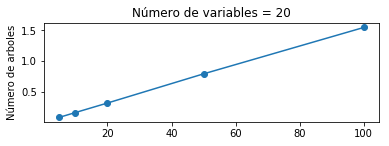

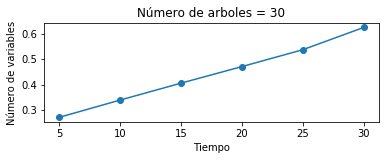

In [23]:
import time
import matplotlib.pyplot as plt

num_trees = [5,10,20,50,100]
var_per_nodes = [5,10,15,20,25,30]

times1 = np.zeros(len(var_per_nodes))
times2 = np.zeros(len(num_trees))

j=0
for num in num_trees:
    time_init = time.perf_counter()
    train_random_forest(num,20)
    time_end = time.perf_counter()
    times2[j] = time_end - time_init
    j+=1
    
j=0
for var in var_per_nodes:
    time_init = time.perf_counter()
    train_random_forest(30,var)
    time_end = time.perf_counter()
    times1[j] = time_end - time_init
    j+=1

plt.subplot(211)
plt.plot(num_trees,times2,'o-')
plt.title('Número de variables = 20')
plt.ylabel('Número de arboles')
plt.show()

plt.subplot(212)
plt.plot(var_per_nodes,times1,'o-')
plt.title('Número de arboles = 30')
plt.ylabel('Número de variables')
plt.xlabel('Tiempo')

plt.show()
